In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from scripts import *

# Autoreload 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
df = pd.read_csv('epi_r.csv')

In [45]:
classifiers = set(['title','calories', 'protein', 'fat', 'sodium', 'healthy','mayonnaise', 
               'milk/cream', 'chili',
               'cottage cheese', 'tomatillo', 'tomato', 'brie', 'cheddar', 'swiss cheese', 'soy',
               'monterey jack', 'fontina', 'gouda', 'feta', 'parmesan', 'mozzarella', 'bread', 
               'marscarpone', 'blue cheese', 'cheese', 'cream cheese', 'goat cheese', 'ricotta', 
               'peanut butter', 'egg', 'egg nog', 'eggplant', 'cream cheese', 'buttermilk', 
               'butternut squash', 'dairy', 'sour cream', 'butter', 
               'salad dressing','stock', 'tortillas', 'vinegar', 'yogurt', 'stock', 
               'pickles','cranberry sauce', 'breadcrumbs', 'salsa', 'soy sauce', 
               'fruit', 'tangerine', 'currant', 'raisin', 'lemon', 'fruit juice', 'quince', 
               'apricot', 'apple juice', 'honeydew', 'pineapple', 'tomato', 'kiwi', 'pomegranate juice', 
               'lemongrass', 'melon', 'tropical fruit', 'plum', 'cranberry sauce', 'fruit', 
               'lemon juice','lime juice', 'passion fruit', 'guava', 'asian pear', 'persimmon', 'date', 
               'cranberry', 'raspberry', 'grapefruit', 'prune', 'berry', 'blueberry', 'dried fruit', 
               'orange juice','kumquat', 'coconut', 'lychee', 'blackberry', 'strawberry', 'nectarine', 
               'watermelon','apple', 'papaya', 'cherry', 'pear', 'banana', 'pomegranate', 'lingonberry', 
               'cantaloupe', 'mango', 'orange', 'peach', 'citrus', 'lime', 'fig', 'grape', 'grains', 
               'rice', 'semolina', 'brown rice', 'cornmeal', 'rye', 'oatmeal', 'quinoa', 
               'hominy/cornmeal/masa', 'barley', 'bulgur', 'wild rice', 'bran', 'oat', 'goat cheese', 
               'whole wheat', 'corn', 'lettuce', 'watercress', 
               'radicchio', 'broccoli rabe', 'broccoli', 'rutabaga', 'brussel sprout', 'mustard greens', 
               'spinach', 'celery', 'chard', 'leafy green', 'cabbage', 'bok choy', 'kale', 'ginger', 
               'mint', 'bell pepper', 'oregano', 'spice', 'poppy', 'dill', 'tarragon', 'caraway', 
               'clove', 'coriander', 'chile pepper', 'vanilla', 'horseradish','saffron', 'sesame oil',
               'fennel', 'cumin', 'herb', 'curry', 'parsley', 'sesame', 'cinnamon', 'rosemary', 
               'thyme', 'anise', 'hot pepper', 'basil', 'cilantro', 'pepper', 'sage', 'nutmeg', 
               'cardamom', 'poblano', 'mustard', 'paprika', 'bean', 'chickpea', 'tamarind',
               'lentil', 'sugar snap pea', 'lima bean', 'green bean', 'legume', 'pea', 'peanut', 
               'mayonnaise', 'mustard greens', 'mustard', 'pickles', 
               'meat', 'beef shank', 'veal', 'chambord', 'duck', 'bacon', 'pork', 
               'brisket', 'poultry', 'lamb', 'sausage', 'rabbit', 'ground lamb', 'pork chop', 
               'pork tenderloin', 'lamb shank', 'ground beef', 'prosciutto', 'lamb chop', 'beef rib', 
               'meatloaf', 'poultry sausage', 'goose', 'chicken', 'venison', 'steak', 'rack of lamb', 
               'meatball', 'ham', 'quail', 'meat', 'hamburger', 'pork rib', 'beef', 'beef tenderloin',
               'buffalo', 'hazelnut', 'chestnut', 'coconut', 
               'seed', 'peanut butter', 'butternut squash', 'macadamia nut', 'nut', 'pine nut', 
               'almond', 'cashew', 'peanut', 'nutmeg', 'pistachio', 'walnut', 'tree nut', 'noodle',
               'couscous', 'lasagna', 'pasta', 'orzo', 'seafood', 'caviar', 'swordfish', 'crab',
               'squid', 'shrimp', 'shellfish', 'lobster', 'bass', 'cod', 'oyster', 'octopus',
               'anchovy', 'trout', 'salmon', 'tilapia', 'halibut', 'mussel', 'snapper', 'sardine',
               'tuna', 'seafood', 'scallop', 'clam', 'fish', 'snack', 'appetizer', 'hummus',
               'yuca', 'lettuce', 'shallot', 'ginger', 'capers', 'bell pepper', 'endive', 
               'butternut squash', 'mushroom', 'tomatillo', 'tomato', 'garlic', 'arugula', 
               'green onion/scallion', 'cucumber', 'asparagus', 'lemongrass', 'sweet potato/yam', 
               'radicchio', 'watercress', 'radish', 'broccoli rabe', 'okra', 'squash', 'leek', 
               'escarole', 'collard greens', 'potato salad', 'broccoli', 'root vegetable', 'kale',
               'chive', 'rutabaga', 'olive', 'mustard greens', 'dorie greenspan', 'zucchini', 
               'parsnip', 'horseradish', 'fennel', 'vegetable', 'potato', 'pumpkin', 'turnip', 
               'spinach', 'parsley', 'artichoke', 'jícama', 'beet', 'avocado', 'onion', 'plantain', 
               'cauliflower', 'celery', 'carrot', 'cabbage', 'jerusalem artichoke', 'yellow squash'])

df = df[classifiers]
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(14431, 295)

In [47]:
continuous = ['calories','protein','fat','sodium']
cont_df = df[continuous]

cont_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,14431.0,6653.709306,375702.546230,0.0,206.0,347.0,601.0,30111218.0
protein,14431.0,92.469129,3516.495587,0.0,3.0,9.0,28.0,236489.0
fat,14431.0,363.846857,21371.757229,0.0,8.0,18.0,34.0,1722763.0
sodium,14431.0,6605.266440,349260.996151,0.0,90.0,306.0,735.5,27675110.0


A lot of zero values on the nutrition values, which may mean they were missing values - we will remove these.

There are also crazy high nutrition values. This may be the case with recipes that require a lot of salt in the ingredients but not end up on the plate (e.g. salted fish). Let's call them outliers and remove them

In [48]:
cont_df.quantile(q=.99)

calories    3329.6
protein      171.0
fat          214.0
sodium      5755.8
Name: 0.99, dtype: float64

In [49]:
# Remove recipes with outliers in calories and sodium
idx = df.loc[(df.calories > 3329.6) | (df.sodium > 5755.8)| (df.protein > 171)| (df.fat > 214)].index
df.drop(index=idx, inplace=True)

# Remove recipes with a 0 in any nutrition value
idx0 = df.loc[(df.calories == 0)|(df.sodium == 0) | (df.protein == 0) | (df.fat == 0)].index
df.drop(index=idx0, inplace=True)

df.shape

(12831, 295)

## Statistical Analysis of 'Healthy' vs untagged recipes

In [50]:
df_stats = df[['title','calories','protein','fat','sodium','healthy']]

df_stats.shape

(12831, 6)

In [51]:
df_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,12831.0,471.520926,370.440767,13.0,227.0,370.0,608.0,3310.0
protein,12831.0,20.384148,24.263864,1.0,4.0,10.0,29.0,171.0
fat,12831.0,27.068506,26.425263,1.0,10.0,19.0,35.0,214.0
sodium,12831.0,554.686774,670.583390,1.0,120.0,335.0,737.5,5753.0
healthy,12831.0,0.083859,0.277188,0.0,0.0,0.0,0.0,1.0


In [52]:
# Add a protein/fat column
df_stats['prot_fat'] =(df_stats.protein/df_stats.fat)

# Add a protein/calorie column
df_stats['prot_cal'] =(df_stats.protein/df_stats.calories)

# Add a protein/sodium column
df_stats['prot_sod'] =(df_stats.protein/df_stats.sodium)

#Add a compound column for all the 'bad' nutrition, in log scale 
df_stats['compound'] =(df_stats.calories*df_stats.fat*df_stats.sodium)
df_stats['compound'] = [math.log(x,10) for x in df_stats['compound']]


In [53]:
healthy_food = df_stats[df_stats['healthy']==1]
unhealthy_food = df_stats[df_stats['healthy']==0]

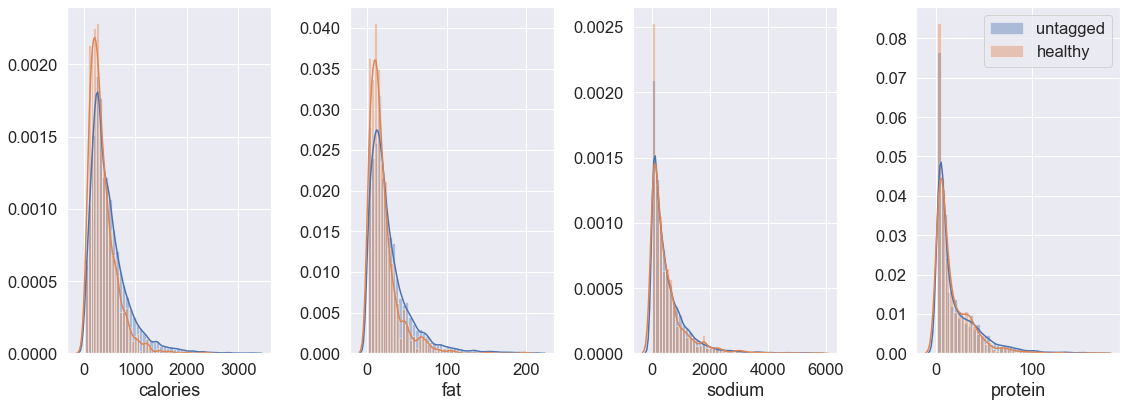

In [54]:
fig, axs = plt.subplots(ncols=4, figsize=(16,6))

sns.distplot(unhealthy_food.calories, label='untagged', ax=axs[0])
sns.distplot(unhealthy_food.fat, label='untagged', ax=axs[1])
sns.distplot(unhealthy_food.sodium, label='untagged', ax=axs[2])
sns.distplot(unhealthy_food.protein, label='untagged', ax=axs[3])

sns.distplot(healthy_food.calories,label='healthy', ax=axs[0])
sns.distplot(healthy_food.fat,label='healthy', ax=axs[1])
sns.distplot(healthy_food.sodium,label='healthy', ax=axs[2])
sns.distplot(healthy_food.protein,label='healthy', ax=axs[3])

plt.tight_layout()
plt.legend()
plt.savefig("img/distribution.png");

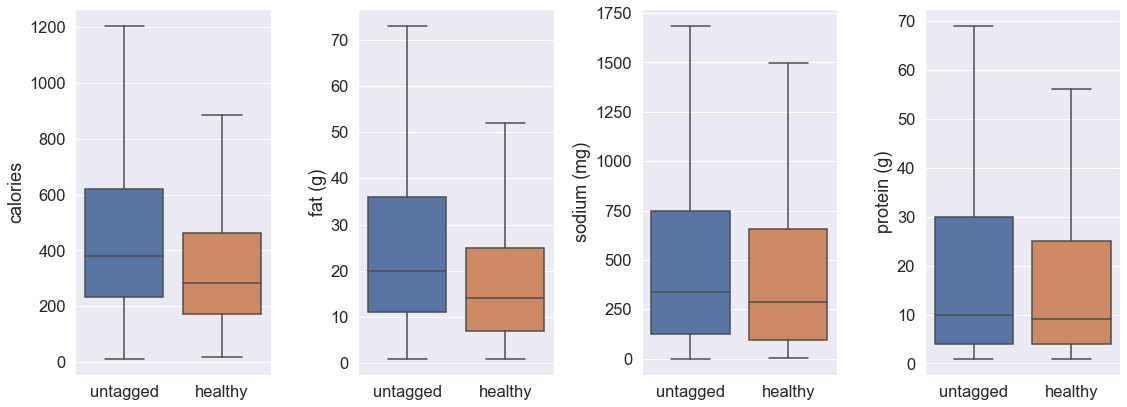

In [192]:
fig, axs = plt.subplots(ncols=4, figsize=(16,6),sharex=True)

sns.boxplot(y= 'calories', x='healthy', data=df_stats, showfliers=False, ax=axs[0])
sns.boxplot(y= 'fat', x='healthy', data=df_stats, showfliers=False, ax=axs[1])
sns.boxplot(y= 'sodium', x='healthy', data=df_stats, showfliers=False, ax=axs[2])
sns.boxplot(y= 'protein', x='healthy', data=df_stats, showfliers=False, ax=axs[3])

axs[0].set_xticklabels(['untagged','healthy'])
axs[1].set_xticklabels(['untagged','healthy'])
axs[2].set_xticklabels(['untagged','healthy'])
axs[3].set_xticklabels(['untagged','healthy'])

axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)
axs[3].set_xlabel(None)

axs[1].set_ylabel('fat (g)')
axs[2].set_ylabel('sodium (mg)')
axs[3].set_ylabel('protein (g)')

plt.tight_layout()
# plt.legend()
plt.savefig("img/boxplots.png");

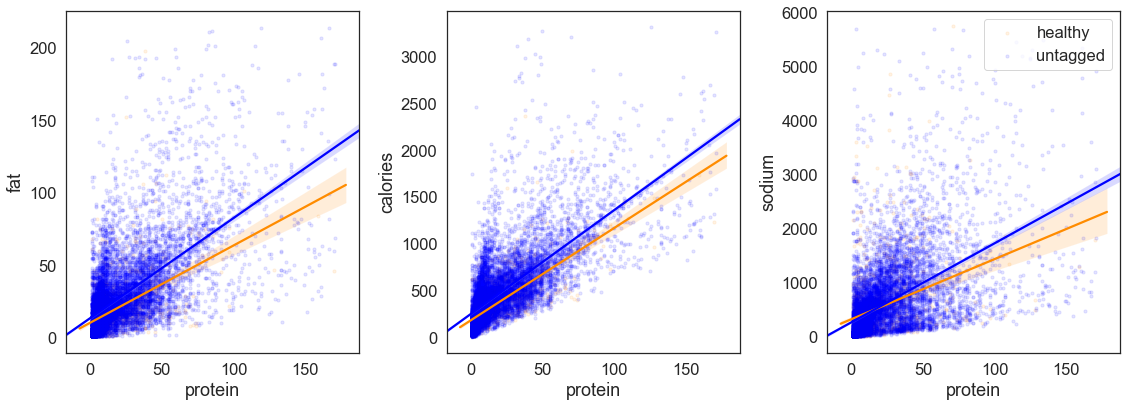

In [196]:
fig, axs = plt.subplots(ncols=3, figsize=(16,6))
sns.set(font_scale=1.5)
sns.set_style("white")

s=10

sns.regplot(x='protein',y='fat',data=healthy_food, label='healthy',scatter_kws={'alpha':0.1,'s':s},ax=axs[0],color='darkorange')
sns.regplot(x='protein',y='fat',data=unhealthy_food, label='untagged',scatter_kws={'alpha':0.1,'s':s},ax=axs[0],color='blue')

sns.regplot(x='protein',y='calories',data=healthy_food, label='healthy',scatter_kws={'alpha':0.1,'s':s},ax=axs[1],color='darkorange')
sns.regplot(x='protein',y='calories',data=unhealthy_food, label='untagged',scatter_kws={'alpha':0.1,'s':s},ax=axs[1],color='blue')

sns.regplot(x='protein',y='sodium',data=healthy_food, label='healthy',scatter_kws={'alpha':0.1,'s':s},ax=axs[2],color='darkorange')
sns.regplot(x='protein',y='sodium',data=unhealthy_food, label='untagged',scatter_kws={'alpha':0.1,'s':s},ax=axs[2],color='blue')

plt.tight_layout()
plt.legend()
plt.savefig("img/regplot_protein.png");

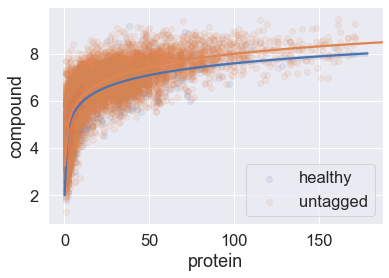

In [56]:
sns.regplot(x='protein',y='compound',data=healthy_food, label='healthy',logx=True, scatter_kws={'alpha':0.1})
sns.regplot(x='protein',y='compound',data=unhealthy_food, label='untagged',logx=True,scatter_kws={'alpha':0.1})
plt.legend();

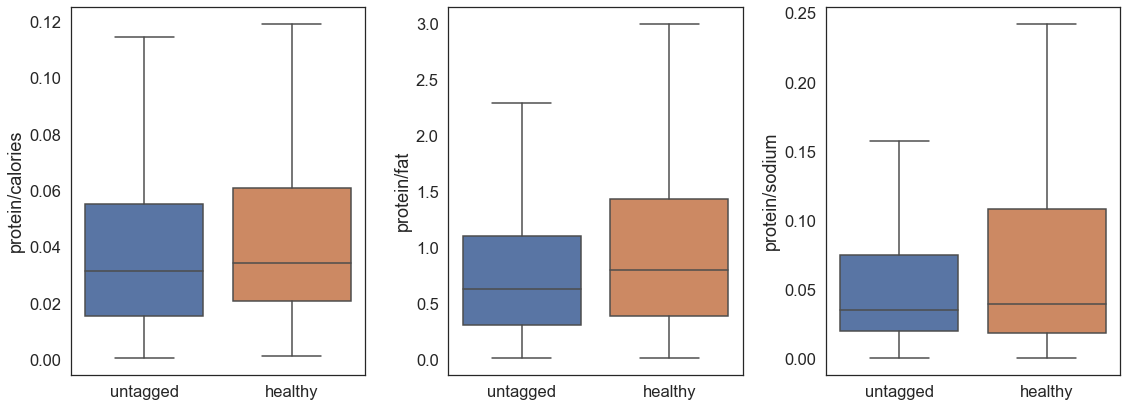

In [200]:
fig, axs = plt.subplots(ncols=3, figsize=(16,6))

sns.boxplot(y= 'prot_cal', x='healthy', data=df_stats, showfliers=False, ax=axs[0])
sns.boxplot(y= 'prot_fat', x='healthy', data=df_stats, showfliers=False, ax=axs[1])
sns.boxplot(y= 'prot_sod', x='healthy', data=df_stats, showfliers=False, ax=axs[2])

axs[0].set_xticklabels(['untagged','healthy'])
axs[1].set_xticklabels(['untagged','healthy'])
axs[2].set_xticklabels(['untagged','healthy'])


axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)


axs[0].set_ylabel('protein/calories')
axs[1].set_ylabel('protein/fat')
axs[2].set_ylabel('protein/sodium')

plt.tight_layout()
# plt.legend()
plt.savefig("img/boxplots.png");

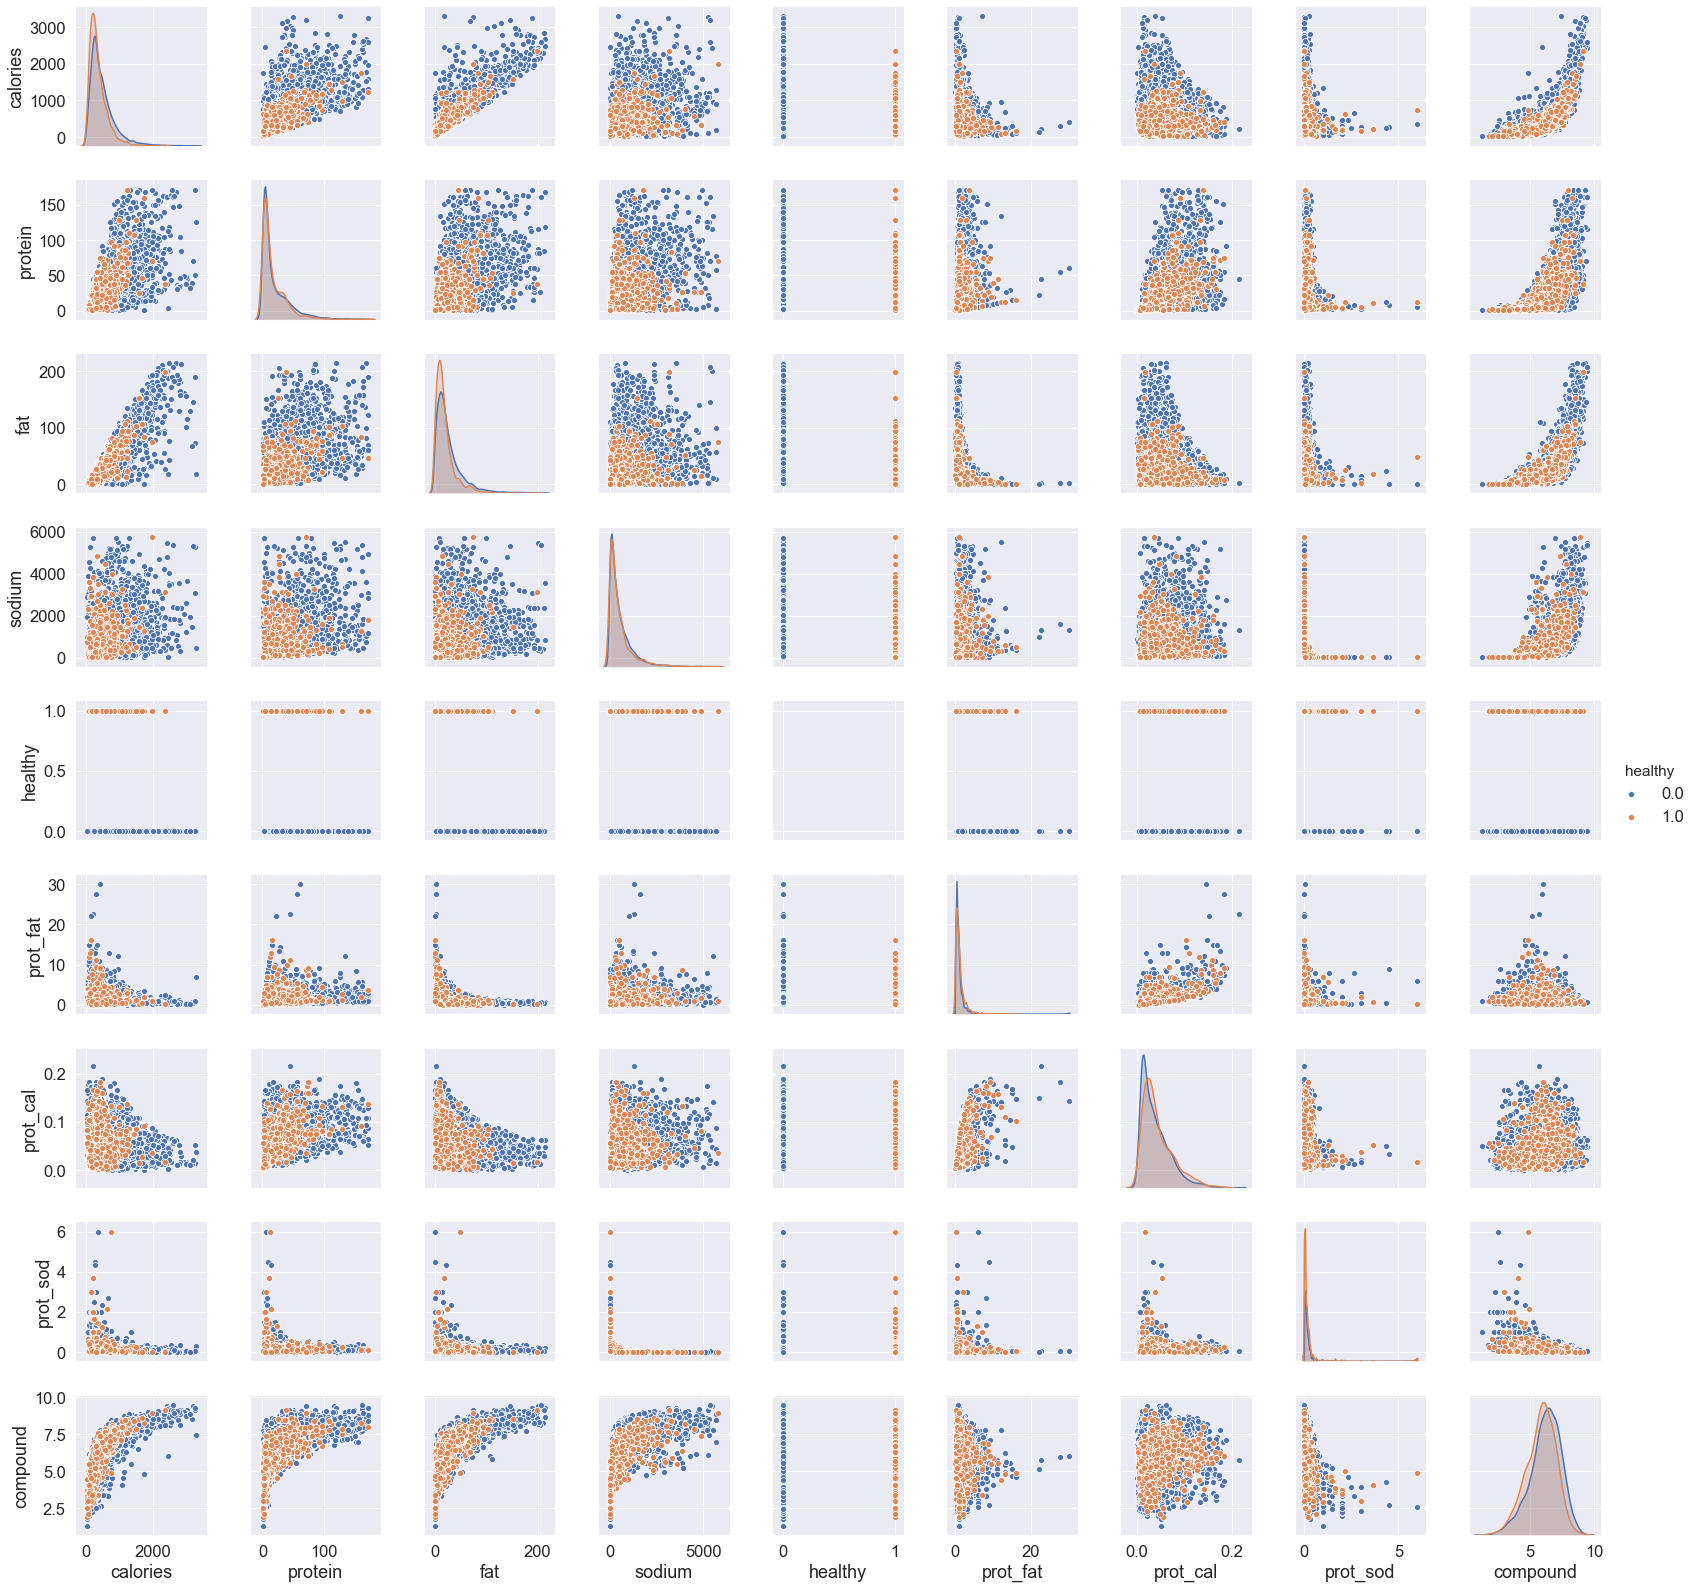

In [57]:
g = sns.pairplot(df_stats, hue="healthy")

In [ ]:
sns.FacetGrid(df_stats, col=['fat',], hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)

In [58]:
#sodium ideal limit of no more than 1,500 mg per day for most adults.
print(healthy_food.sodium.mean())
print(unhealthy_food.sodium.mean())

506.57156133828994
559.0910250957039


In [59]:
healthy_food.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,1076.0,356.474907,265.080854,18.000000,174.000000,284.500000,461.750000,2359.000000
protein,1076.0,17.321561,19.965988,1.000000,4.000000,9.000000,25.000000,170.000000
fat,1076.0,19.531599,18.904212,1.000000,7.000000,14.000000,25.000000,198.000000
sodium,1076.0,506.571561,649.601724,2.000000,93.750000,285.000000,655.000000,5753.000000
healthy,1076.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
prot_fat,1076.0,1.200099,1.439862,0.014706,0.384615,0.800000,1.438125,16.000000
prot_cal,1076.0,0.044280,0.031832,0.001595,0.021039,0.034483,0.061059,0.182266
prot_sod,1076.0,0.112455,0.298830,0.000343,0.018587,0.040000,0.108200,6.000000
compound,1076.0,5.890793,1.136925,1.857332,5.205071,5.999360,6.709230,9.166184


In [60]:
unhealthy_food.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,11755.0,482.051723,376.881156,13.000000,232.000000,381.000000,621.000000,3310.000000
protein,11755.0,20.664483,24.601498,1.000000,4.000000,10.000000,30.000000,171.000000
fat,11755.0,27.758401,26.904614,1.000000,11.000000,20.000000,36.000000,214.000000
sodium,11755.0,559.091025,672.326093,1.000000,123.000000,339.000000,748.500000,5697.000000
healthy,11755.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
prot_fat,11755.0,0.937283,1.179668,0.009009,0.307692,0.629630,1.102130,30.000000
prot_cal,11755.0,0.039562,0.030021,0.000571,0.015707,0.031496,0.055380,0.215311
prot_sod,11755.0,0.078542,0.171422,0.000340,0.020188,0.035714,0.075158,6.000000
compound,11755.0,6.244158,1.196035,1.301030,5.555138,6.359090,7.093181,9.461216


In [76]:
# Bootstrap healthy and untagged foods per nutrition
from math import sqrt
from sklearn.utils import resample

In [146]:
#prot_fat

x_mean = healthy_food.prot_fat.mean()
y_mean = unhealthy_food.prot_fat.mean()

x_std = healthy_food.prot_fat.std()
y_std = unhealthy_food.prot_fat.std()

t_fat = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_stats.prot_fat.mean()

xx = healthy_food.prot_fat - x_mean + z
yy = unhealthy_food.prot_fat - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_fat:
        t_bs+=1

t_bs/n_sim

0.0

In [145]:
#prot_cal
x_mean = healthy_food.prot_cal.mean()
y_mean = unhealthy_food.prot_cal.mean()

x_std = healthy_food.prot_cal.std()
y_std = unhealthy_food.prot_cal.std()

t_cal = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_stats.prot_cal.mean()

xx = healthy_food.prot_cal - x_mean + z
yy = unhealthy_food.prot_cal - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_cal:
        t_bs+=1

t_bs/n_sim

0.0

In [144]:
#prot_sod
x_mean = healthy_food.prot_sod.mean()
y_mean = unhealthy_food.prot_sod.mean()

x_std = healthy_food.prot_sod.std()
y_std = unhealthy_food.prot_sod.std()

t_sod = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_stats.prot_sod.mean()

xx = healthy_food.prot_sod - x_mean + z
yy = unhealthy_food.prot_sod - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_sod:
        t_bs+=1

t_bs/n_sim

0.0

In [148]:
#sodium

x_mean = healthy_food.sodium.mean()
y_mean = unhealthy_food.sodium.mean()

x_std = healthy_food.sodium.std()
y_std = unhealthy_food.sodium.std()

t_fat = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_stats.sodium.mean()

xx = healthy_food.sodium - x_mean + z
yy = unhealthy_food.sodium - y_mean + z

t_bs=0
n_sim = 10000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_fat:
        t_bs+=1

t_bs/n_sim

0.9913

In [199]:
#fat

x_mean = healthy_food.fat.mean()
y_mean = unhealthy_food.fat.mean()

x_std = healthy_food.fat.std()
y_std = unhealthy_food.fat.std()

t_fat = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_stats.fat.mean()

xx = healthy_food.fat - x_mean + z
yy = unhealthy_food.fat - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_fat:
        t_bs+=1

t_bs/n_sim

1.0

In [141]:
#protein
x_mean = healthy_food.protein.mean()
y_mean = unhealthy_food.protein.mean()

x_std = healthy_food.protein.std()
y_std = unhealthy_food.protein.std()

t_protein = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_stats.protein.mean()

xx = healthy_food.protein - x_mean + z
yy = unhealthy_food.protein - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_protein:
        t_bs+=1

t_bs/n_sim


1.0

In [149]:
#calories
x_mean = healthy_food.calories.mean()
y_mean = unhealthy_food.calories.mean()

x_std = healthy_food.calories.std()
y_std = unhealthy_food.calories.std()

t_calories = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_stats.calories.mean()

xx = healthy_food.calories - x_mean + z
yy = unhealthy_food.calories - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_calories:
        t_bs+=1

t_bs/n_sim


1.0

## Healthy Recipe Classifications

In [61]:
X = df.drop(['title','healthy'],axis=1)
y = df['healthy']

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1902, stratify = y, test_size = .1)

### Resampling the whole dataset

In [62]:
from sklearn.utils import resample
# concatenate our training data back together
X_resample = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
healthy = X_resample[X_resample.healthy==1]
untagged = X_resample[X_resample.healthy==0]
print(f"healthy original count: {len(healthy)}")
print(f"untagged original count: {len(untagged)}")

# downsample majority
untagged_downsampled = resample(untagged,
                               replace = False, # sample without replacement
                               n_samples = len(healthy), # match minority n
                               random_state = 19) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([untagged_downsampled, healthy])

# checking counts
downsampled.healthy.value_counts()

healthy original count: 968
untagged original count: 10579


1.0    968
0.0    968
Name: healthy, dtype: int64

In [63]:
X_rs_train = downsampled.drop('healthy', axis=1)
y_rs_train = downsampled['healthy']

In [64]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

# Running a standard random forest 
forest = RandomForestClassifier(n_jobs=-1,
                                random_state=19)

forest.fit(X_rs_train, y_rs_train)

pred_forest = forest.predict(X_rs_train)
pred_forest_test = forest.predict(X_test)

print_metrics(y_rs_train, pred_forest,"Train")
print_metrics(y_test, pred_forest_test,"Test")


Train Accuracy Score: 0.9881
Train Precision Score: 0.9907
Train Recall Score: 0.9855
Train F1 Score: 0.9881
Test Accuracy Score: 0.7321
Test Precision Score: 0.1862
Test Recall Score: 0.6481
Test F1 Score: 0.2893


In [118]:
# Using Grid Search and Cross Validation

# Set grid search params
param_grid_forest = [ 
  {'n_estimators': [200, 250, 275],
   'criterion': ['gini','entropy'], 
   'max_depth': [5,8,9] 
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=forest,
            param_grid=param_grid_forest,
            scoring='precision',
            refit='precision',
            cv=5, verbose=2, return_train_score = True,
            n_jobs=-1)

# Fit using grid search
gs_rf.fit(X_rs_train, y_rs_train)

best_parameters = gs_rf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best precision: %.3f' % gs_rf.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.0min finished


Grid Search found the following optimal parameters: 
criterion: 'gini'
max_depth: 9
n_estimators: 250
Best precision: 0.664


In [135]:
# Fit using grid search

best_forest = gs_rf.best_estimator_
best_forest.fit(X_rs_train, y_rs_train)

pred_gs_rf_train = best_forest.predict(X_rs_train)
pred_gs_rf_test = best_forest.predict(X_test)

print_metrics(y_rs_train, pred_gs_rf_train, 'RF Train')
print_metrics(y_test, pred_gs_rf_test, 'RF Test')


RF Train Accuracy Score: 0.7846
RF Train Precision Score: 0.741
RF Train Recall Score: 0.875
RF Train F1 Score: 0.8025
RF Test Accuracy Score: 0.6285
RF Test Precision Score: 0.1602
RF Test Recall Score: 0.8056
RF Test F1 Score: 0.2673


Confusion matrix, without normalization


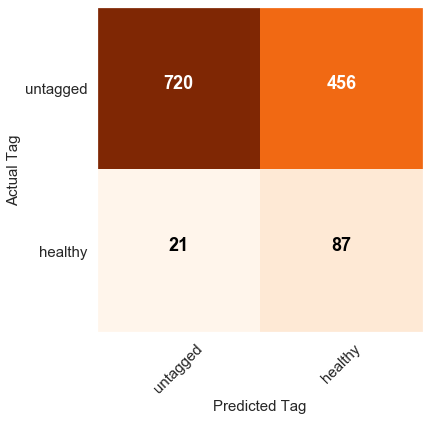

In [120]:
from sklearn.metrics import confusion_matrix
classes=['untagged','healthy']
cnf_matrix = confusion_matrix(y_test, pred_gs_rf_test)
plot_confusion_matrix(cnf_matrix, classes, normalize=False, cmap=plt.cm.Oranges)

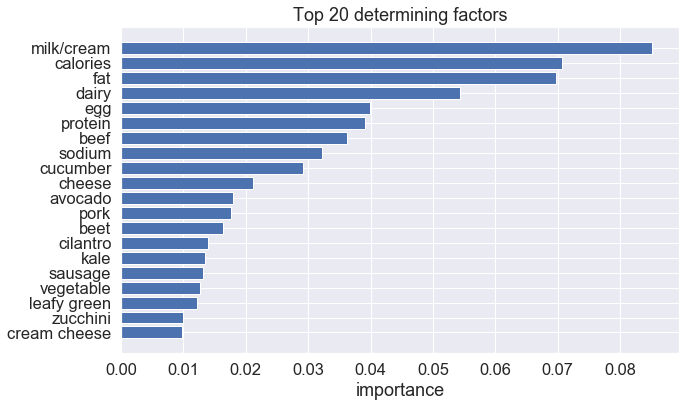

In [121]:
# us_rf = RandomForestClassifier(bootstrap=True, max_depth=2, max_features='auto',n_estimators=100)
# us_rf.fit(X_train, y_train)
create_plot_of_feature_importances(best_forest, X_train)
plt.savefig('img/feat_importance')

### Resampling within pipeline, with cross-validation

In [104]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV

#### Undersampling 

In [158]:
us = RandomUnderSampler()
rf = RandomForestClassifier(random_state=1902, n_jobs=-1)

pipeline = Pipeline([('undersample', us), ('rf', rf)])

kf = StratifiedKFold(n_splits = 5, random_state=1902)

params = {'rf__max_depth' : [5],
    'rf__max_features' : ['auto','sqrt'],
    'rf__bootstrap' : [True, False],
    'rf__n_estimators' : [100, 200]
}

grid_undersample = GridSearchCV(pipeline, param_grid = params, scoring = 'precision', cv = kf)

grid_undersample.fit(X_train, y_train)

pred_undersample_train = grid_undersample.predict(X_train)
pred_undersample_test = grid_undersample.predict(X_test)

best_parameters = grid_undersample.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best precision score: %.3f' % grid_undersample.best_score_)


Grid Search found the following optimal parameters: 
rf__bootstrap: True
rf__max_depth: 5
rf__max_features: 'sqrt'
rf__n_estimators: 200
Best precision score: 0.145


Confusion matrix, without normalization


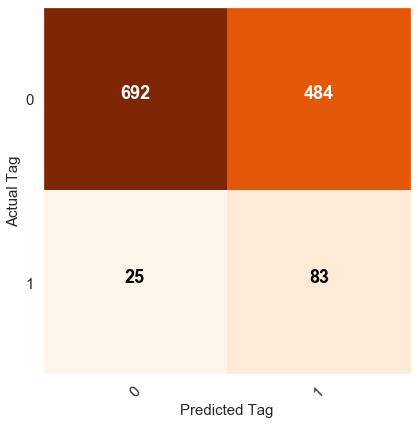

In [160]:
from sklearn.metrics import confusion_matrix
classes=[0,1]
cnf_matrix = confusion_matrix(y_test, pred_undersample_test)
plot_confusion_matrix(cnf_matrix, classes, normalize=False, cmap=plt.cm.Oranges)

In [159]:
print_metrics(y_train, pred_undersample_train, 'Undersampling Train')
print_metrics(y_test, pred_undersample_test, 'Undersampling')

Undersampling Train Accuracy Score: 0.6137
Undersampling Train Precision Score: 0.1568
Undersampling Train Recall Score: 0.8244
Undersampling Train F1 Score: 0.2635
Undersampling Accuracy Score: 0.6036
Undersampling Precision Score: 0.1464
Undersampling Recall Score: 0.7685
Undersampling F1 Score: 0.2459


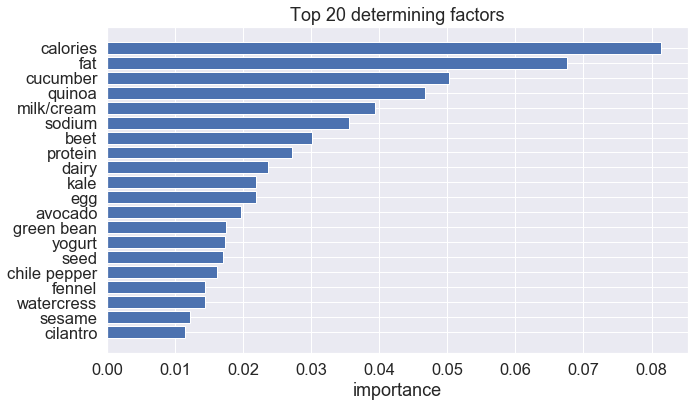

In [163]:
us_rf = RandomForestClassifier(bootstrap=True, max_depth=5, max_features='sqrt',n_estimators=200)
us_rf.fit(X_train, y_train)
create_plot_of_feature_importances(us_rf, X_train)
plt.tight_layout()
plt.savefig("img/top20")

#### SMOTEEN 

In [126]:
smote = SMOTEENN()
rf = RandomForestClassifier(random_state=1902, n_jobs=-1)

pipeline = Pipeline([('smote', smote), ('rf', rf)])

params = {'rf__max_depth' : [2,5],
    'rf__max_features' : ['auto','sqrt'],
    'rf__bootstrap' : [True, False],
    'rf__n_estimators' : [100, 200]
}

grid_smote = GridSearchCV(pipeline, param_grid = params, scoring = 'precision', cv = kf)

grid_smote.fit(X_train, y_train)

pred_smote_train = grid_smote.predict(X_train)
pred_smote_test = grid_smote.predict(X_test)

best_parameters = grid_smote.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best precision score: %.3f' % grid_smote.best_score_)


Grid Search found the following optimal parameters: 
rf__bootstrap: False
rf__max_depth: 5
rf__max_features: 'sqrt'
rf__n_estimators: 200
Best precision score: 0.135


In [152]:
print_metrics(y_train, pred_smote_train, 'SMOTEENN Train')
print_metrics(y_test, pred_smote_test, title='SMOTEENN Test')

SMOTEENN Train Accuracy Score: 0.5371
SMOTEENN Train Precision Score: 0.1371
SMOTEENN Train Recall Score: 0.8543
SMOTEENN Train F1 Score: 0.2363
SMOTEENN Test Accuracy Score: 0.5164
SMOTEENN Test Precision Score: 0.1255
SMOTEENN Test Recall Score: 0.7963
SMOTEENN Test F1 Score: 0.2169


Confusion matrix, without normalization


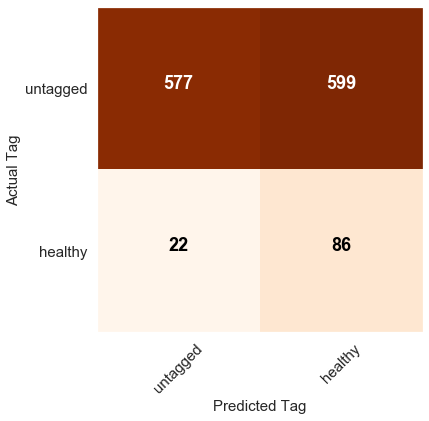

In [128]:
classes=['untagged','healthy']
cnf_matrix = confusion_matrix(y_test, pred_smote_test)
plot_confusion_matrix(cnf_matrix, classes, normalize=False, cmap=plt.cm.Oranges)

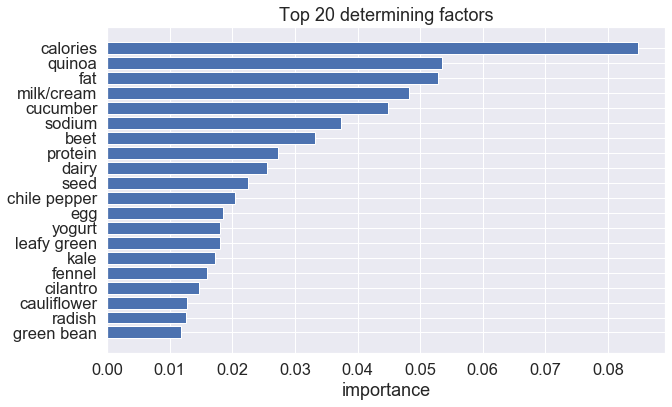

In [129]:
smote_rf = RandomForestClassifier(bootstrap=False, max_depth=5, max_features='sqrt',n_estimators=200)
smote_rf.fit(X_train, y_train)
create_plot_of_feature_importances(us_rf, X_train)

#### Random Oversampling within CV

In [130]:
os = RandomOverSampler()
rf = RandomForestClassifier(random_state=1902, n_jobs=-1)

pipeline = Pipeline([('oversample', os), ('rf', rf)])

kf = StratifiedKFold(n_splits = 5)

params = {'rf__max_depth' : [2,5],
    'rf__max_features' : ['auto','sqrt'],
    'rf__bootstrap' : [True, False],
    'rf__n_estimators' : [100, 200]
}

grid_os = GridSearchCV(pipeline, param_grid = params, scoring = 'precision', cv = kf)

grid_os.fit(X_train, y_train)

pred_oversample_train = grid_os.predict(X_train)
pred_oversample_test = grid_os.predict(X_test)

best_parameters = grid_os.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best precision score: %.3f' % grid_os.best_score_)


Grid Search found the following optimal parameters: 
rf__bootstrap: True
rf__max_depth: 5
rf__max_features: 'sqrt'
rf__n_estimators: 200
Best precision score: 0.147


In [153]:
print_metrics(y_train, pred_oversample_train, 'Oversampling Train')
print_metrics(y_test, pred_oversample_test, title='Oversampling')

Oversampling Train Accuracy Score: 0.6455
Oversampling Train Precision Score: 0.1636
Oversampling Train Recall Score: 0.7851
Oversampling Train F1 Score: 0.2708
Oversampling Accuracy Score: 0.6215
Oversampling Precision Score: 0.1379
Oversampling Recall Score: 0.6667
Oversampling F1 Score: 0.2286


Confusion matrix, without normalization


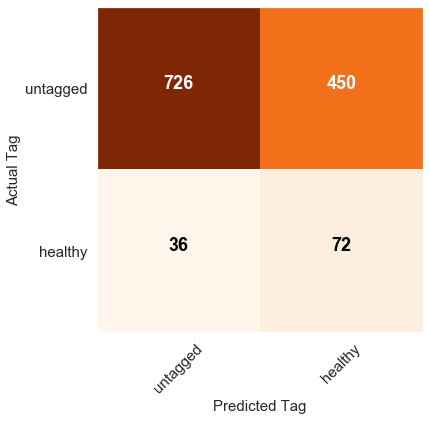

In [132]:
classes=['untagged','healthy']
cnf_matrix = confusion_matrix(y_test, pred_oversample_test)
plot_confusion_matrix(cnf_matrix, classes, normalize=False, cmap=plt.cm.Oranges)

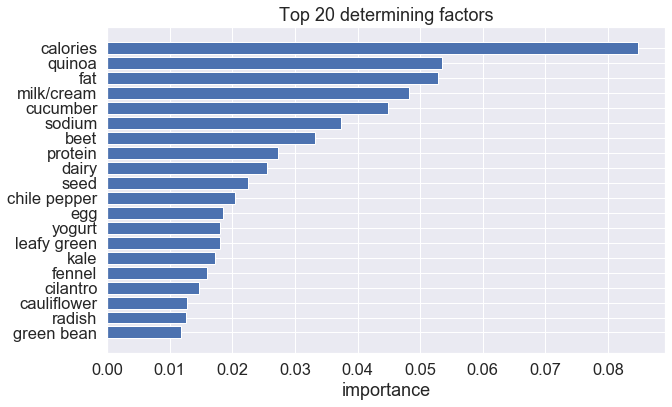

In [133]:
os_rf = RandomForestClassifier(bootstrap=True, max_depth=5, max_features='sqrt',n_estimators=200)
os_rf.fit(X_train, y_train)
create_plot_of_feature_importances(us_rf, X_train)

### XGBoost with undersampling within pipeline

In [201]:
from sklearn.preprocessing import StandardScaler

# Scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [216]:
# Tuning XGBoost
import xgboost as xgb

us = RandomUnderSampler()
xgb_mod = xgb.XGBClassifier()

pipeline = Pipeline([('undersample', us), ('xgb_mod', xgb_mod)])

params = {'xgb_mod__learning_rate' : [0.2, 0.1, 0.07],
    'xgb_mod__max_depth' : [2,3],
    'xgb_mod__subsample' : [0.75,0.8],
    'xgb_mod__n_estimators' : [ 300, 400]
}

xgb_undersample = GridSearchCV(pipeline, param_grid = params, scoring = 'precision', cv = kf)

xgb_undersample.fit(X_train_scaled, y_train)

pred_xgb_train = xgb_undersample.predict(X_train_scaled)
pred_xgb_test = xgb_undersample.predict(X_test_scaled)

best_parameters = xgb_undersample.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best precision score: %.3f' % xgb_undersample.best_score_)

Grid Search found the following optimal parameters: 
xgb_mod__learning_rate: 0.2
xgb_mod__max_depth: 2
xgb_mod__n_estimators: 400
xgb_mod__subsample: 0.8
Best precision score: 0.190


In [217]:
print_metrics(y_train, pred_xgb_train, 'XGB Train')
print_metrics(y_test, pred_xgb_test, 'XGB')

XGB Train Accuracy Score: 0.735
XGB Train Precision Score: 0.2256
XGB Train Recall Score: 0.8884
XGB Train F1 Score: 0.3598
XGB Accuracy Score: 0.7009
XGB Precision Score: 0.1835
XGB Recall Score: 0.7407
XGB F1 Score: 0.2941


Confusion matrix, without normalization


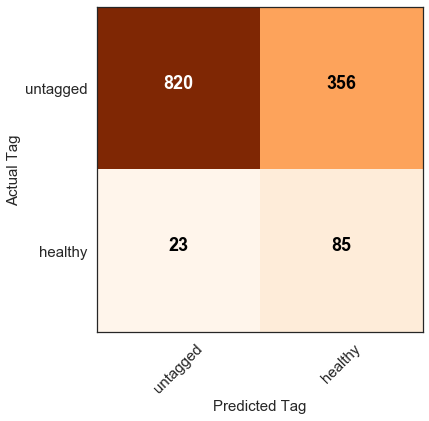

In [214]:
classes=['untagged','healthy']
cnf_matrix = confusion_matrix(y_test, pred_xgb_test)
plot_confusion_matrix(cnf_matrix, classes, normalize=False, cmap=plt.cm.Oranges)
plt.grid()

In [218]:
xgb_model = xgb.XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=400, subsample=0.8)
xgb_model.fit(X_train_scaled, y_train)
create_plot_of_feature_importances(xgb_model, X_train_scaled)
plt.tight_layout()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [9]:
import random

classmates = ["Daniel","Joey","Yashar","Sorin","Alyssa",
              "Aneesh","Sisay","Phil","Nathan","Jalal",
              "Max","Sharon","Nasrin","Andrea"]

random.sample(classmates,len(classmates))

['Aneesh',
 'Nasrin',
 'Nathan',
 'Joey',
 'Phil',
 'Max',
 'Alyssa',
 'Sisay',
 'Andrea',
 'Yashar',
 'Sorin',
 'Sharon',
 'Jalal',
 'Daniel']